In [1]:
import sys
from os.path import join
import numpy as np
import importlib
import pandas as pd
from glob import glob
from tqdm import tqdm
from ast import literal_eval
from scipy.stats import pearsonr,spearmanr
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
importlib.reload(mu)

<module 'metric_utils' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/utils/metric_utils.py'>

In [ ]:
sys.path.append(join(GITDIR,'utils'))
import metric_utils as mu, seq_utils as su, utils

In [30]:
PROJ_DIR = '/home/gcgreen2/alignment'
GITDIR = join(PROJ_DIR, 'SequenceAlignmentAndSketching')
DATASETS = 'gc0.2_sub1.68_ins8.04_del3.16  malaria_reads  gc0.2_del3.16  gc0.2_ins8.04   gc0.2  gc0.2_ins8.04_del3.16  gc0.2_sub1.68'#  malaria_sub1.68_ins8.04_del3.16'
DATASETS = DATASETS.split()
gt_path_ = lambda dset: join(GITDIR, 'data', dset, 'ground_truth.txt')
# fasta_path = lambda dset: join(GITDIR, 'data', dset, 'reads.fasta')
# FASTA_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/filtered_fasta')
DATASETS_NCTC = np.loadtxt(join(PROJ_DIR,'NCTC_list.txt'), dtype=str)
gt_path_nctc_ = lambda dset: join(PROJ_DIR, 'spectral_jaccard_similarity', 'groundTruths', dset+'_daligner_ground_truth.txt')


In [45]:
METHODS = ['max','inflec','inflec2',*['mh_k'+str(i) for i in range(11,13)]]
NAMES = ['suffix hash, max','suffix hash, thresh w/ subtraction','suffix hash, thresh', 'minhash k=11', 'minhash k=12']
pred_path_ = lambda method,dset: join(PROJ_DIR, 'out', dset, method+'.tsv')

In [46]:
def get_gt_df(gt_path, min_theta=0.1):
    gt_df = pd.read_csv(gt_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    thetas = gt_df['overlap'] / np.min(gt_df[['l1','l2']], axis=1)
    gt_df = gt_df[thetas > min_theta]
    return gt_df

In [47]:
def get_pred_df(pred_path, min_val=0):
    pred_df = pd.read_csv(pred_path, sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    pred_df = pred_df[pred_df['overlap'] > min_val]
    return pred_df

# AUROC

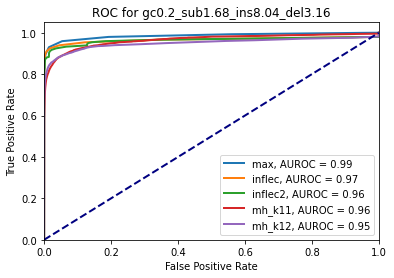

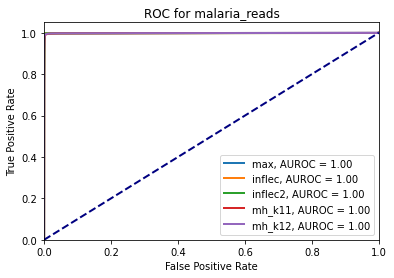

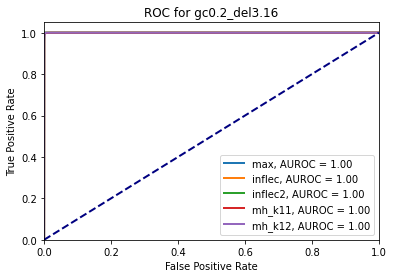

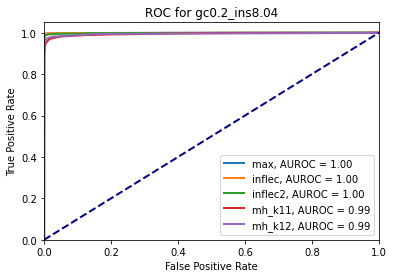

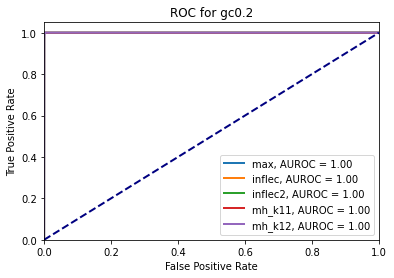

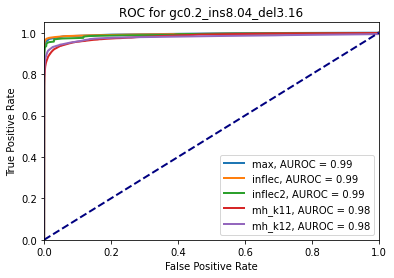

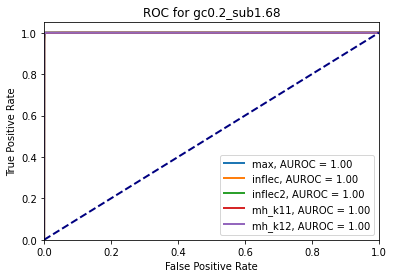

In [48]:
for dset in DATASETS:
    pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
    gt_df = get_gt_df(gt_path_(dset))
    title = f"ROC for {dset}"
    mu.roc(pred_dfs, gt_df, METHODS, title)

In [49]:
for dset in DATASETS_NCTC:
    pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
    gt_df = get_gt_df(gt_path_nctc_(dset))
    title = f"ROC for {dset}"
    mu.roc(pred_dfs, gt_df, METHODS, title)

TypeError: '<' not supported between instances of 'int' and 'str'

<Figure size 432x288 with 0 Axes>

# Precision Recall Curve

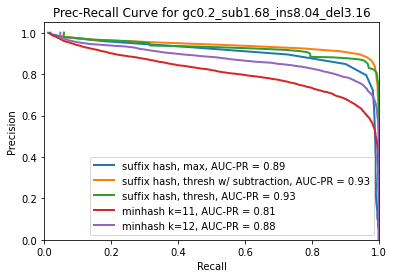

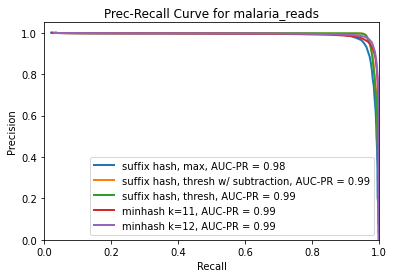

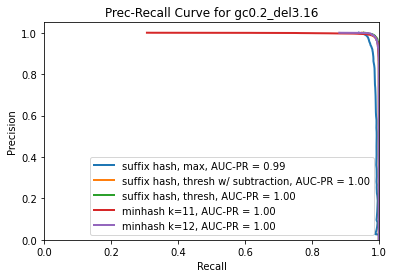

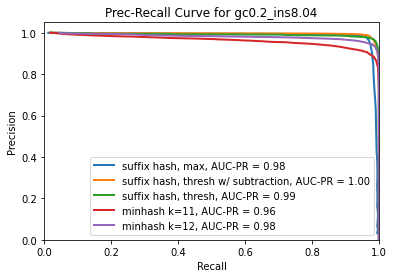

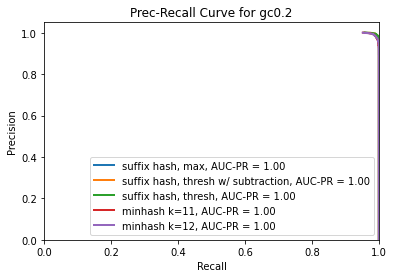

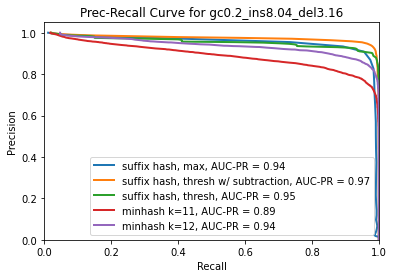

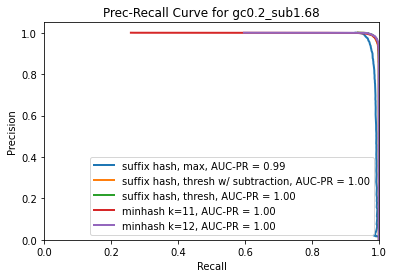

In [50]:
for dset in DATASETS:
    pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
    gt_df = get_gt_df(gt_path_(dset))
    title = f"Prec-Recall Curve for {dset}"
    mu.pr_curves(pred_dfs, gt_df, NAMES, title)

In [ ]:
for dset in DATASETS_NCTC:
    pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
    gt_df = get_gt_df(gt_path_nctc_(dset))
    title = f"Prec-Recall Curve for {dset}"
    mu.pr_curves(pred_dfs, gt_df, NAMES, title)

## look at overlap estimates

minhash

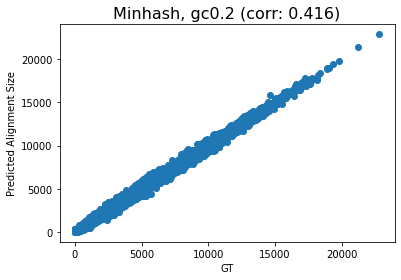

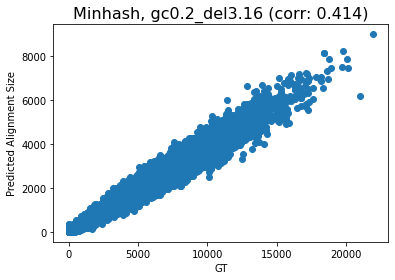

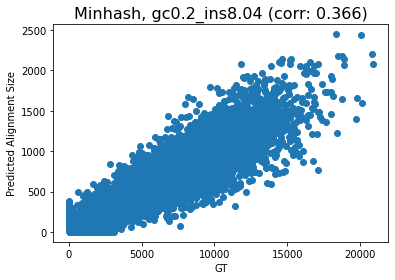

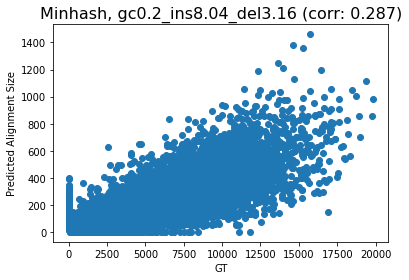

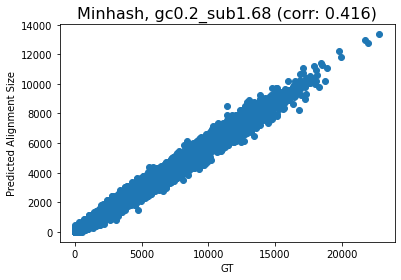

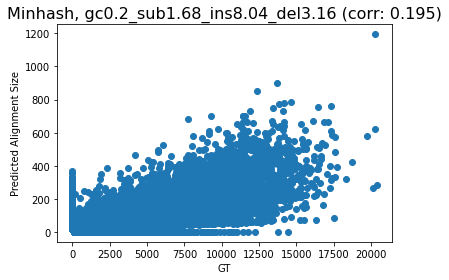

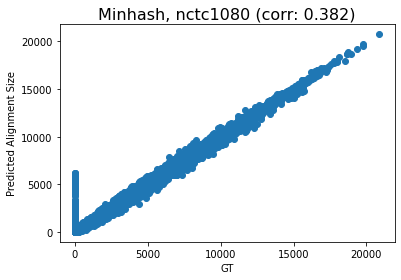

In [20]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_mh(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    overlaps = mu.get_overlaps(pred_df, gt_df)
    corr = spearmanr(overlaps[:,0], overlaps[:,1]).correlation

    plt.figure()
    plt.plot(overlaps[:,1],overlaps[:,0],'o')
    plt.title(f'Minhash, {dset} (corr: {round(corr,3)})',fontsize=16)
    plt.xlabel('GT')
    plt.ylabel('Predicted Alignment Size')
    plt.pause(0.01)

suffix hash, top matching

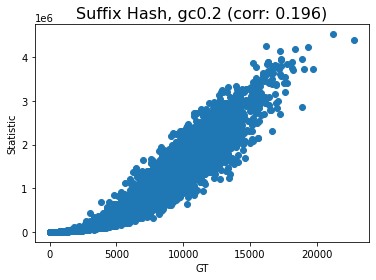

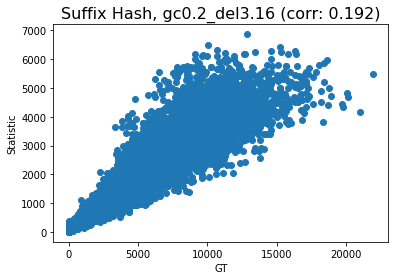

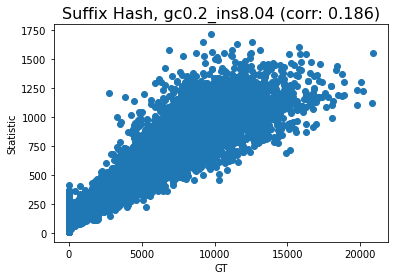

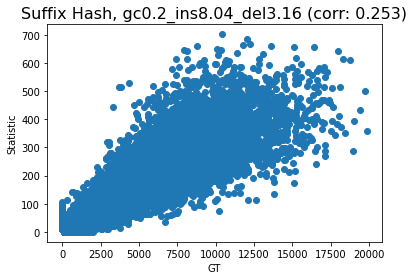

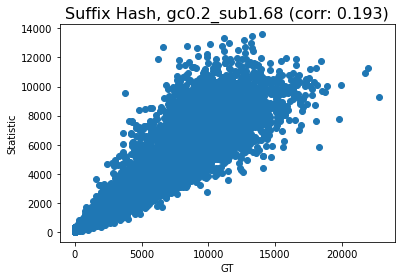

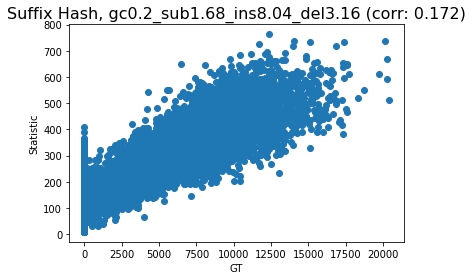

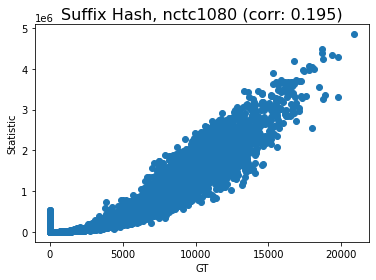

In [21]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
#     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
    overlaps = mu.get_overlaps(pred_df, gt_df)
    corr = spearmanr(overlaps[:,0], overlaps[:,1]).correlation

    plt.figure()
    plt.plot(overlaps[:,1],overlaps[:,0],'o')
    plt.title(f'Suffix Hash, {dset} (corr: {round(corr,3)})',fontsize=16)
    plt.xlabel('GT')
    plt.ylabel('Statistic')
    plt.pause(0.01)

# ####################################

## See which minhash $k$ is best

In [7]:
METHODS = ['mh_k'+str(i) for i in range(10,20)]

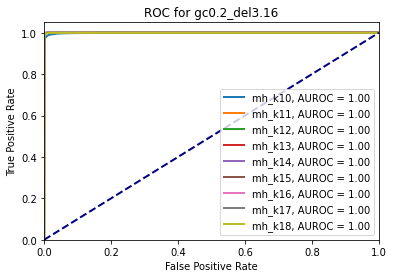

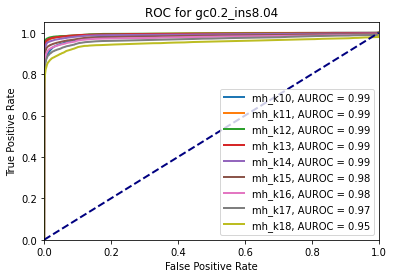

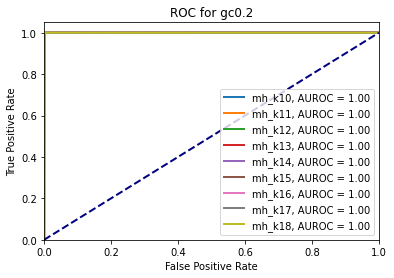

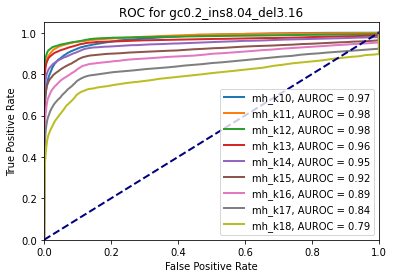

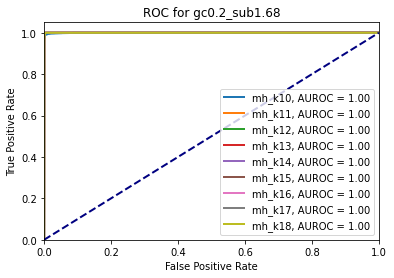

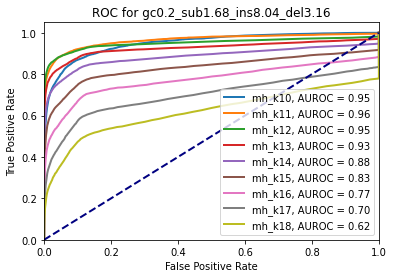

FileNotFoundError: [Errno 2] No such file or directory: '/home/gcgreen2/alignment/out/malaria_sub1.68_ins8.04_del3.16/mh_k10.tsv'

In [10]:
for dset in DATASETS:
    pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
    gt_df = get_gt_df(gt_path_(dset))
    title = f"ROC for {dset}"
    mu.roc(pred_dfs, gt_df, METHODS, title)

In [35]:
METHODS

['max', 'inflec', 'inflec2', 'mh_k11', 'mh_k12']

In [36]:
dset = 'malaria_reads'
pred_dfs = [get_pred_df(pred_path_(method,dset)) for method in METHODS]
gt_df = get_gt_df(gt_path_(dset))

In [37]:
ids = np.concatenate((pred_dfs[0].i1.values,pred_dfs[0].i2.values,gt_df.i1.values,gt_df.i2.values))

In [27]:
ids = np.unique(np.str(ids))

TypeError: '<' not supported between instances of 'str' and 'int'

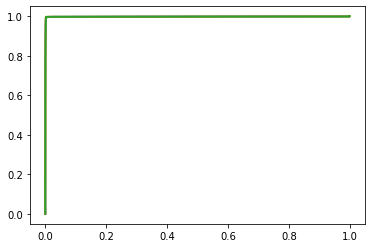

In [39]:
title = f"ROC for {dset}"
mu.roc(pred_dfs, gt_df, METHODS, title)

# ####################################

In [40]:
dset = 'malaria_reads'
seqs,ids = su.get_seqs('/home/gcgreen2/alignment/data/malaria_reads/reads.fasta',return_ids=True)

In [51]:
dset = 'malaria_reads'
seqs,ids = su.get_seqs('/home/gcgreen2/alignment/data/malaria_reads/ERR9746080.fasta',return_ids=True)

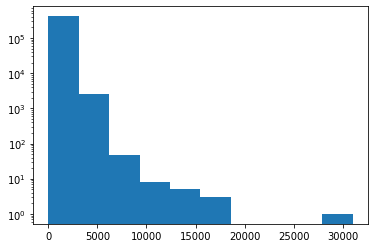

In [53]:
plt.hist([len(s) for s in seqs])
plt.yscale('log')

(array([1.11749e+05, 6.56990e+04, 2.12571e+05, 1.61160e+04, 5.53900e+03,
        2.61500e+03, 1.70100e+03, 6.26000e+02, 2.12000e+02, 1.53000e+02]),
 array([1.0000e+00, 5.0050e+02, 1.0000e+03, 1.4995e+03, 1.9990e+03,
        2.4985e+03, 2.9980e+03, 3.4975e+03, 3.9970e+03, 4.4965e+03,
        4.9960e+03]),
 <BarContainer object of 10 artists>)

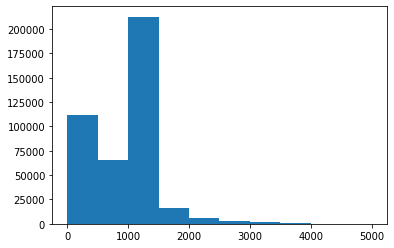

In [54]:
plt.hist([len(s) for s in seqs if len(s)<5000])
# plt.yscale('log')

In [43]:
np.savetxt('/home/gcgreen2/alignment/SequenceAlignmentAndSketching/data/malaria_reads/ids.txt', ids, fmt='%s')

In [44]:
idx_to_id = {str(idx+1):i for idx,i in enumerate(ids)}
for k in range(10,20):
    aln_path = '/home/gcgreen2/alignment/out/malaria_reads/mh_k'+str(k)+'.tsv.bak'
    new_aln_path = '/home/gcgreen2/alignment/out/malaria_reads/mh_k'+str(k)+'.tsv'
    with open(aln_path, 'r') as fh:
        with open(new_aln_path, 'w') as new_fh:
            for line in fh.readlines():
                new = line.split()
                new[0] = idx_to_id[new[0]]
                new[1] = idx_to_id[new[1]]
                new_fh.write('\t'.join(new)+'\n')

In [40]:
for dset in DATASETS_NCTC:
    reads_path = 
    seqs,ids = su.get_seqs('/home/gcgreen2/alignment/SequenceAlignmentAndSketching/data/malaria_reads/reads.fasta',return_ids=True)

In [43]:
np.savetxt('/home/gcgreen2/alignment/SequenceAlignmentAndSketching/data/malaria_reads/ids.txt', ids, fmt='%s')

In [44]:
idx_to_id = {str(idx+1):i for idx,i in enumerate(ids)}
for k in range(10,20):
    aln_path = '/home/gcgreen2/alignment/out/malaria_reads/mh_k'+str(k)+'.tsv.bak'
    new_aln_path = '/home/gcgreen2/alignment/out/malaria_reads/mh_k'+str(k)+'.tsv'
    with open(aln_path, 'r') as fh:
        with open(new_aln_path, 'w') as new_fh:
            for line in fh.readlines():
                new = line.split()
                new[0] = idx_to_id[new[0]]
                new[1] = idx_to_id[new[1]]
                new_fh.write('\t'.join(new)+'\n')

# ####################################

# ####################################

suffix hash, edit distance

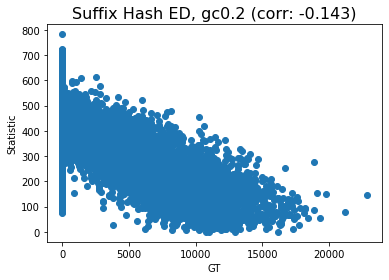

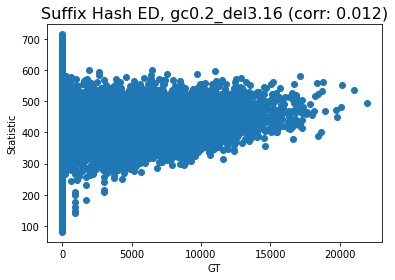

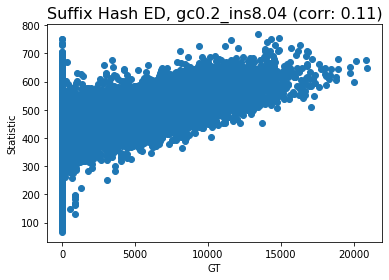

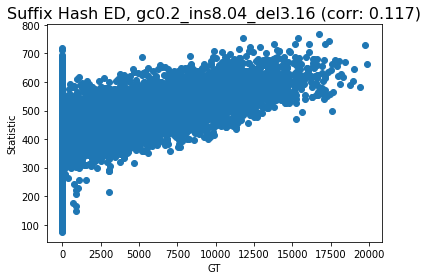

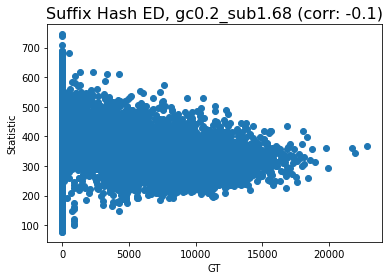

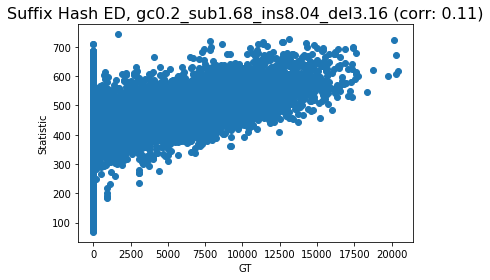

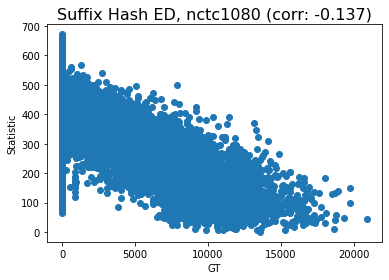

In [23]:
for dset in DATASETS:
    try:
        pred_df = pd.read_csv(pred_path_sh2(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
        gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
    #     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
        overlaps = mu.get_overlaps(pred_df, gt_df)
        corr = spearmanr(overlaps[:,0], overlaps[:,1]).correlation

        plt.figure()
        plt.plot(overlaps[:,1],overlaps[:,0],'o')
        plt.title(f'Suffix Hash ED, {dset} (corr: {round(corr,3)})',fontsize=16)
        plt.xlabel('GT')
        plt.ylabel('Statistic')
        plt.pause(0.01)
    except:
        print(dset, 'not ready')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:19<00:00, 6344.32it/s]


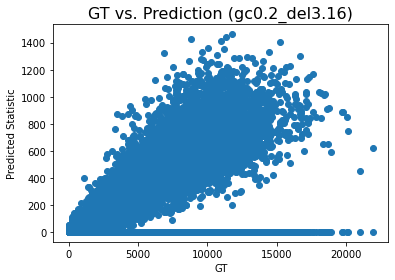

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:20<00:00, 6251.08it/s]


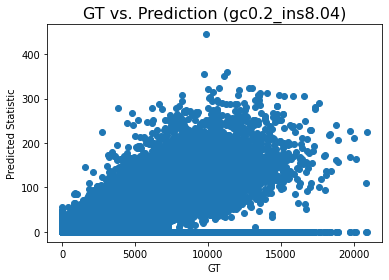

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:20<00:00, 6239.02it/s]


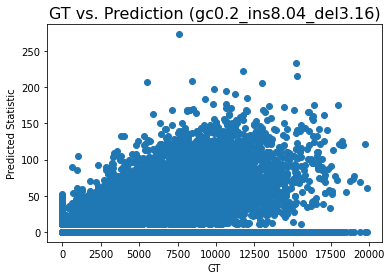

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:19<00:00, 6291.72it/s]


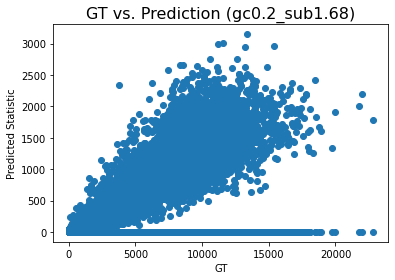

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:20<00:00, 6280.31it/s]


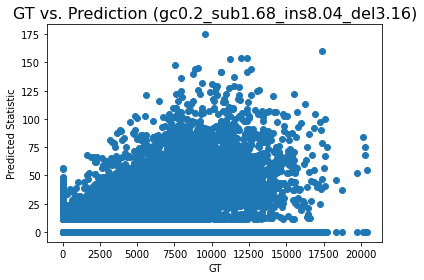

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:20<00:00, 6249.13it/s]


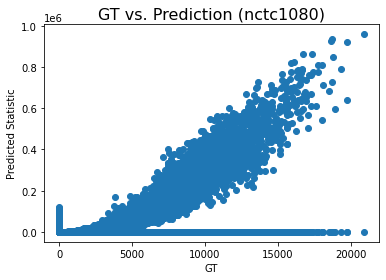

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:19<00:00, 6322.77it/s]


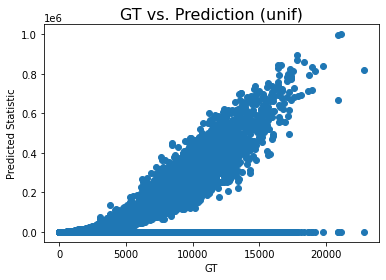

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:19<00:00, 6335.56it/s]


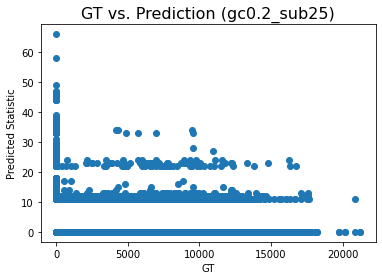

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 502503/502503 [01:19<00:00, 6282.25it/s]


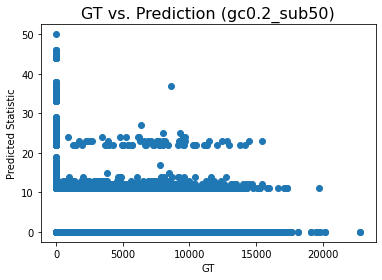

In [15]:
# for dset in DATASETS[1:]:
#     pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
#     arrs = pred_df.loc[:,'array']
#     vals = [thresh(literal_eval(arr)) for arr in tqdm(arrs, leave=True, position=0)]
#     pred_df.loc[:,'overlap'] = vals
#     gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
# #     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
#     overlaps = mu.get_overlaps(pred_df, gt_df)

#     plt.figure()
#     plt.plot(overlaps[:,0],overlaps[:,1],'o')
#     plt.title(f'GT vs. Prediction ({dset})',fontsize=16)
#     plt.xlabel('GT')
#     plt.ylabel('Predicted Statistic')
#     plt.pause(0.01)

## thresholding

top matching

In [6]:
dset = 'gc0.2'
pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])

In [7]:
vals = ','.join(pred_df['array'].values[:1000])
vals = literal_eval(vals)
vals = np.concatenate(vals)

In [14]:
np.count_nonzero(vals<20)

499226

In [15]:
len(vals)

500000

(array([1.64300e+03, 8.22060e+04, 2.39889e+05, 1.28083e+05, 3.52220e+04,
        1.13800e+04, 5.24000e+02, 2.20000e+02, 4.50000e+01, 1.40000e+01]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

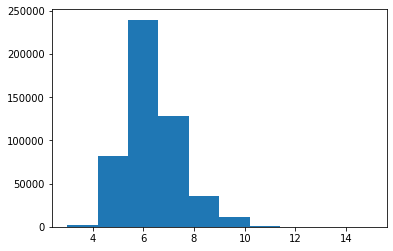

In [11]:
plt.hist(vals[np.where(vals<20)])

In [13]:
NORMAL1 = {'method':1, 'init':(7,2,2),'bounds':[(4,20),(1,5),(0.5,0.9)]}
mu,sigma = utils.fit_normal(vals, **NORMAL1)

mu: 7.579866469519707 stdv: 1.4225403518228015 offset: 0.9 thresh: 10.42494717316531


edit dist

In [18]:
dset = 'test'
pred_df = pd.read_csv(pred_path_sh2(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])

In [19]:
vals = ','.join(pred_df['array'].values)
vals = literal_eval(vals)
vals = np.concatenate(vals)

(array([7788.,    0.,    0.,    0.,   30.,  606., 3967., 7040., 2845.,
         224.]),
 array([-1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.]),
 <BarContainer object of 10 artists>)

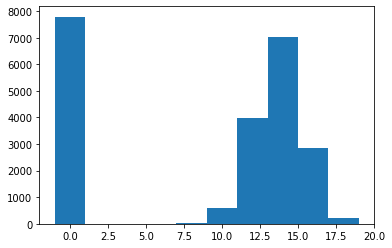

In [20]:
plt.hist(vals)

In [21]:
NORMAL2 = {'method':2, 'init':(13,2,2),'bounds':[(4,20),(1,5),(0.5,1.5)]}
mu,sigma = utils.fit_normal(vals, **NORMAL2)

mu: 13.442357513920427 stdv: 1.6801567139689908 offset: 0.9710273443040681 thresh: 16.80267094185841


# ####################################

# ####################################

In [17]:
gt_df, pred_df = mu.load_dfs(DATASETS[0])
gt_df.head(2)

i1   i2  overlap    l1     l2
0   1   23   3395.0  8066   7885
1   1  116   5066.0  8066  22131

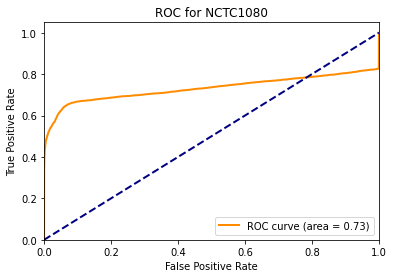

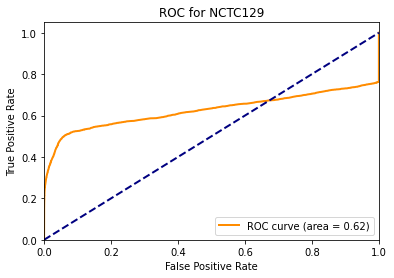

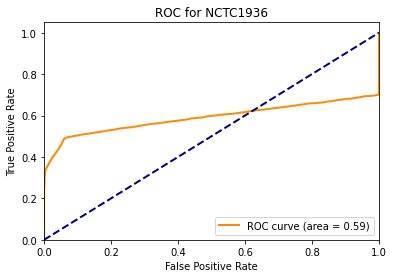

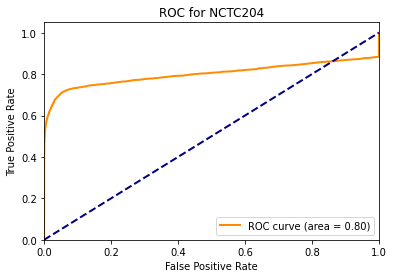

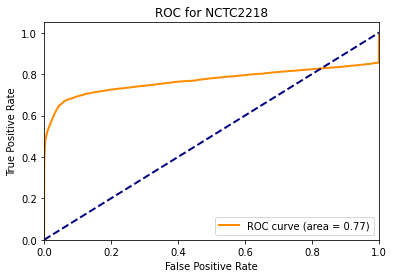

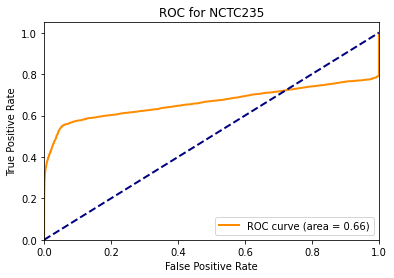

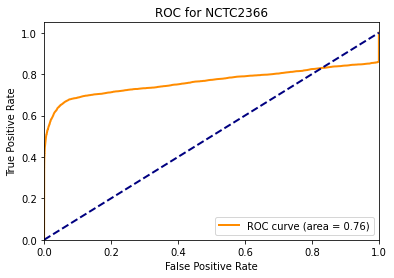

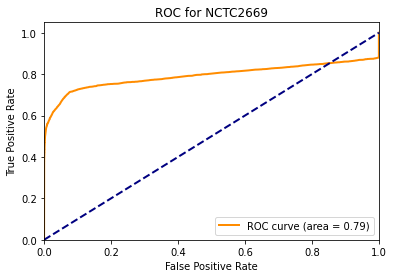

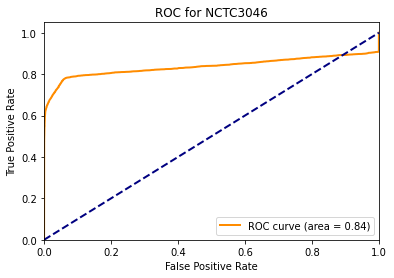

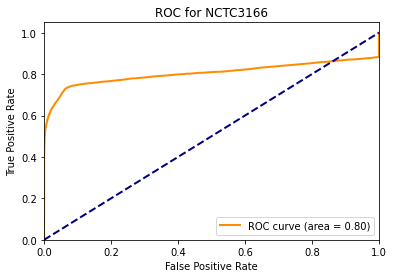

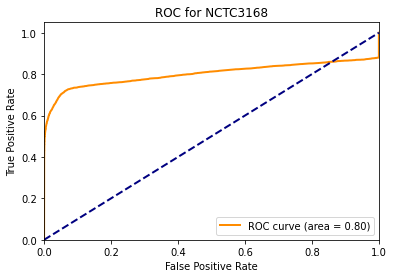

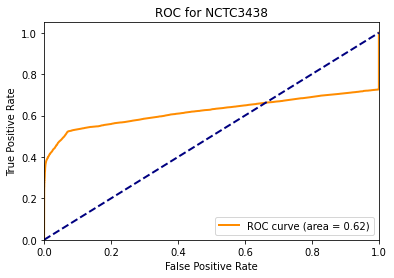

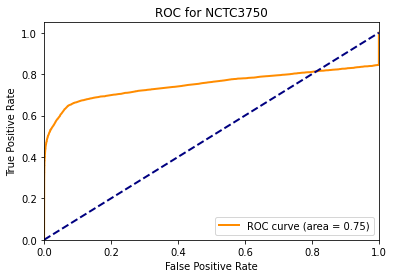

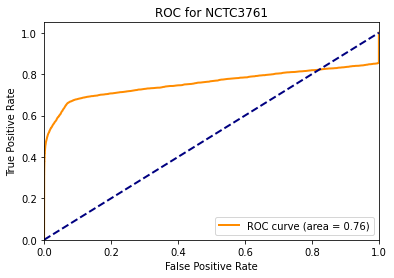

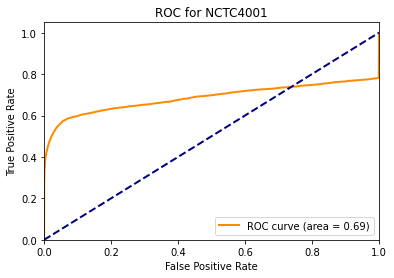

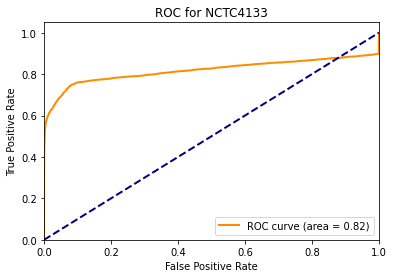

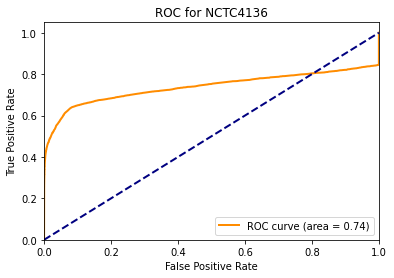

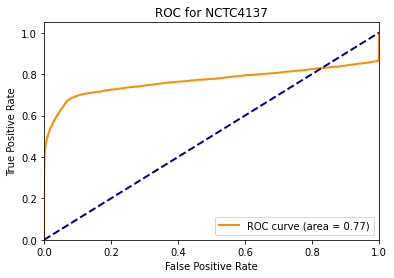

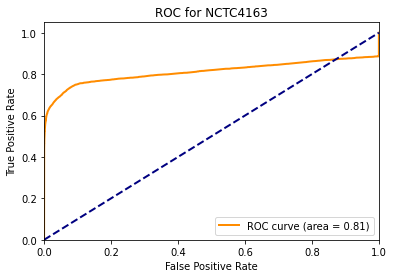

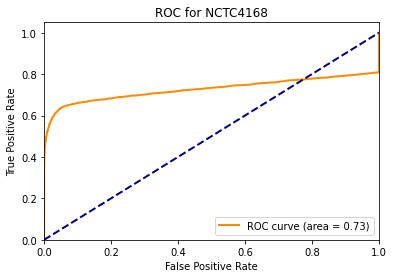

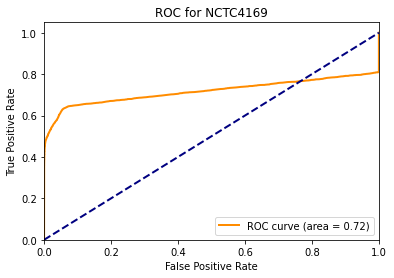

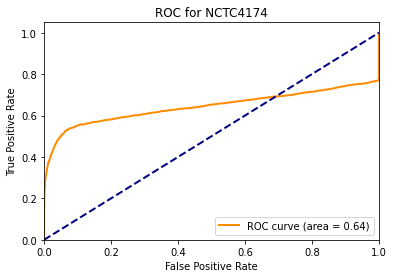

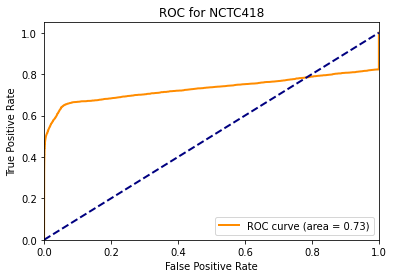

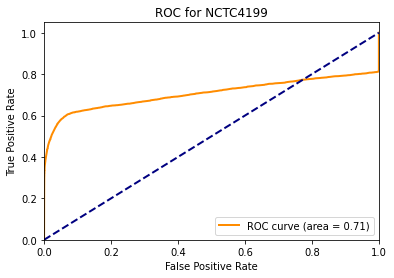

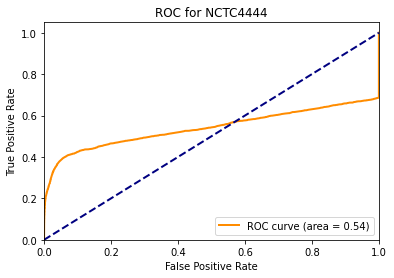

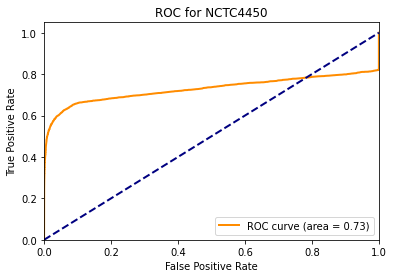

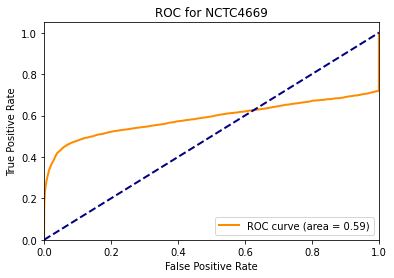

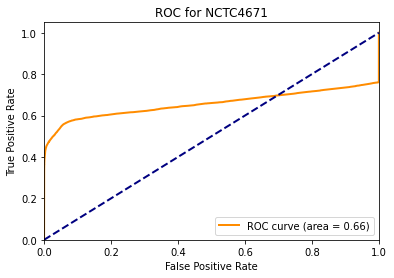

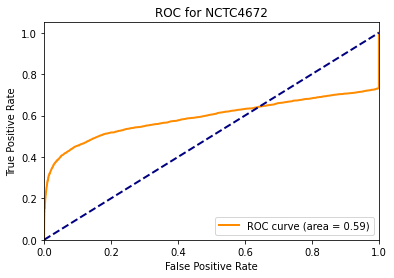

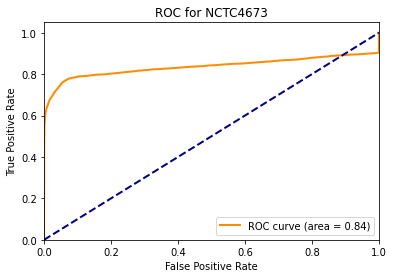

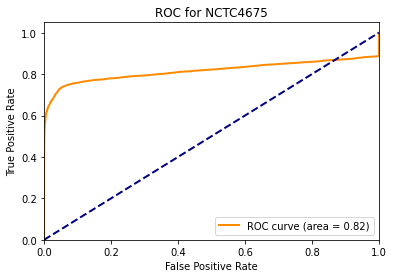

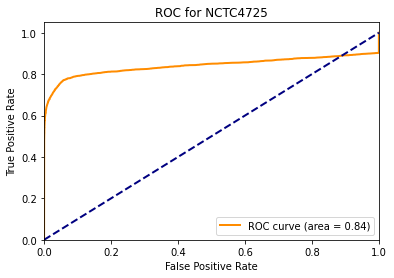

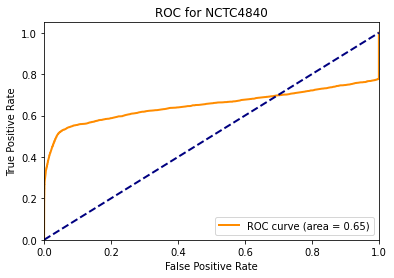

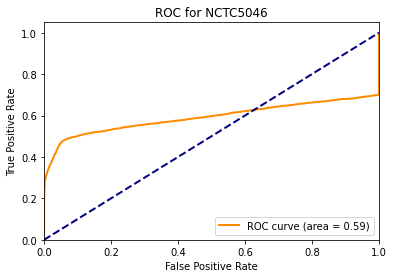

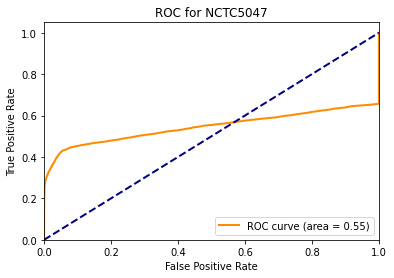

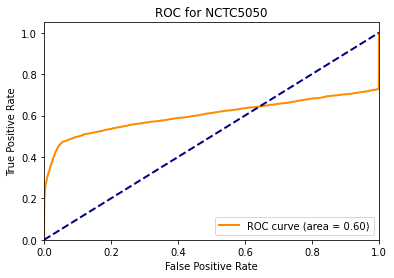

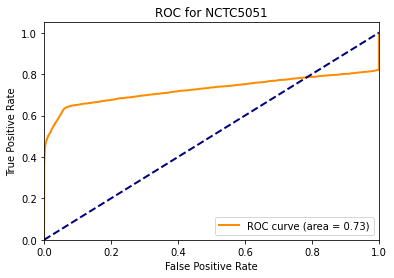

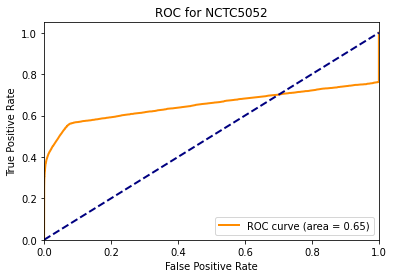

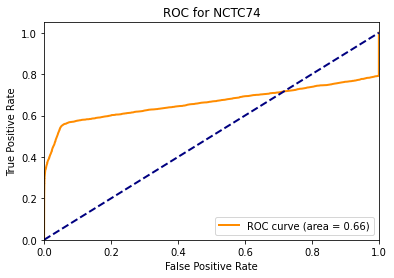

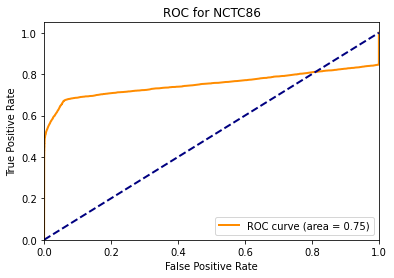

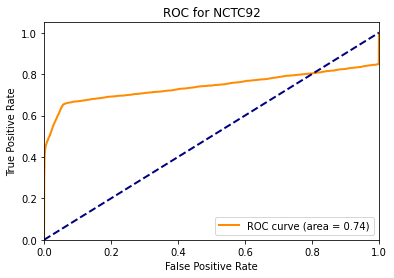

In [44]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[0])
    plt.pause(0.01)

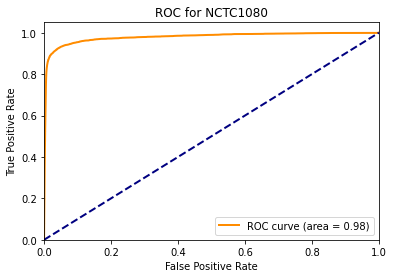

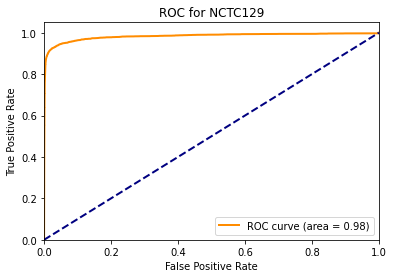

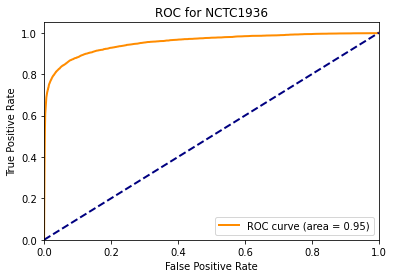

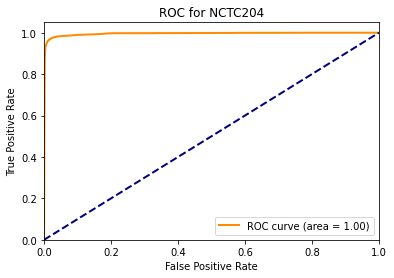

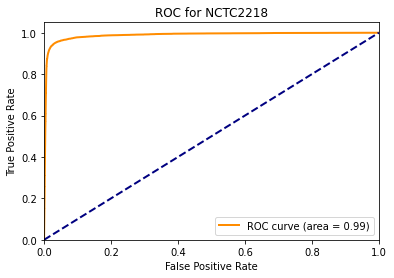

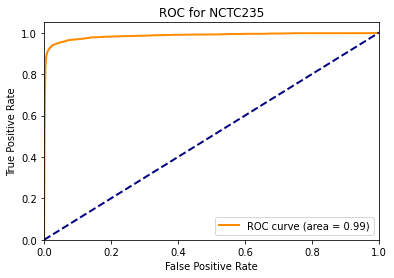

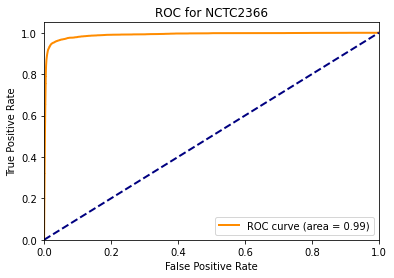

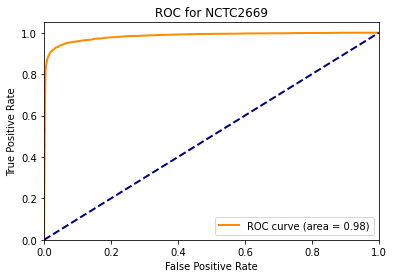

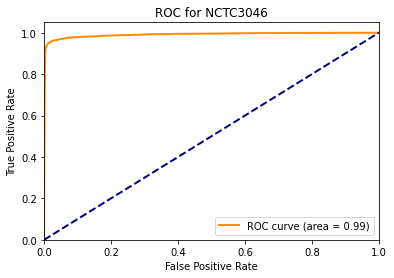

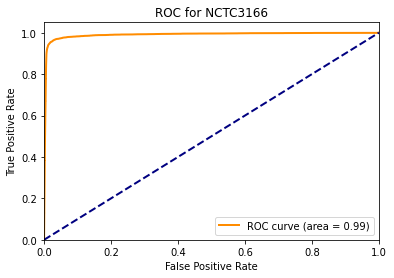

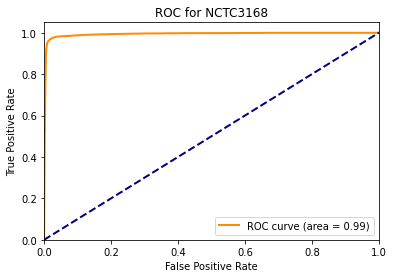

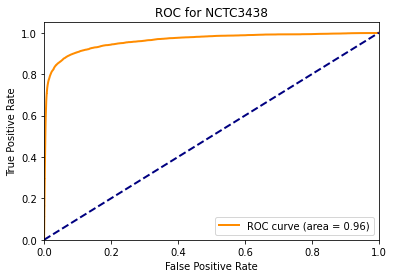

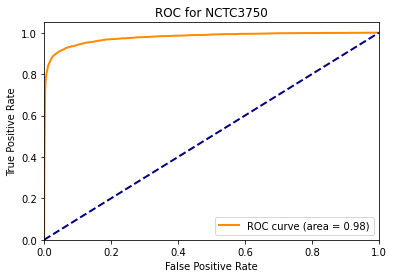

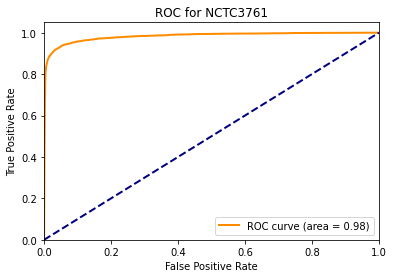

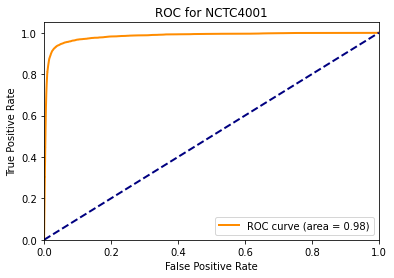

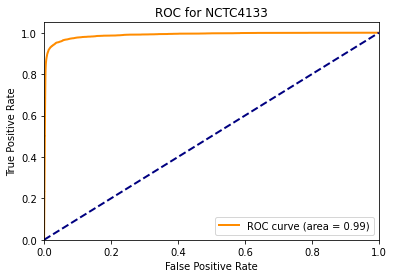

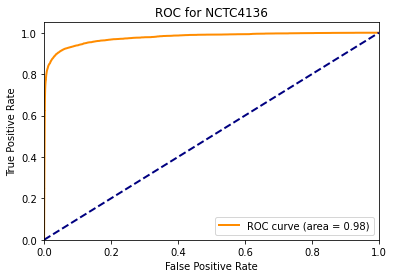

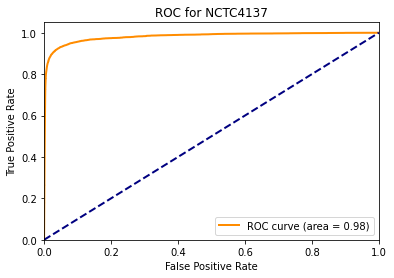

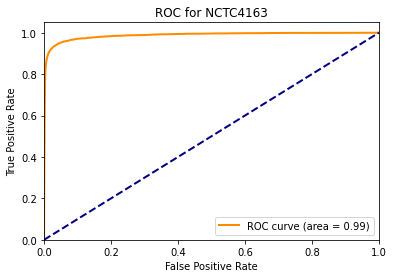

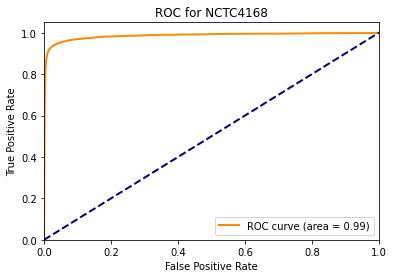

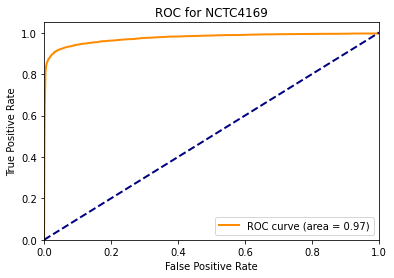

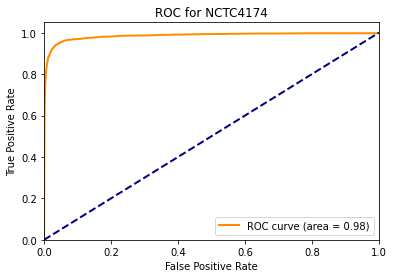

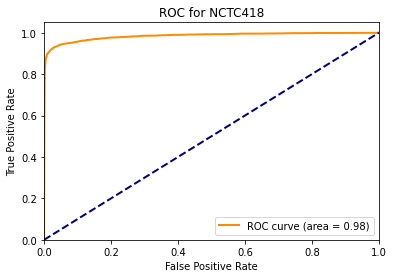

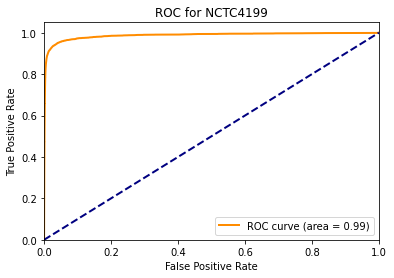

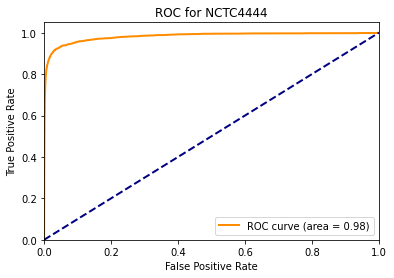

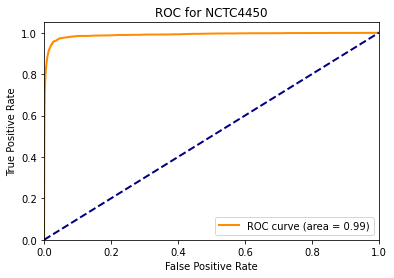

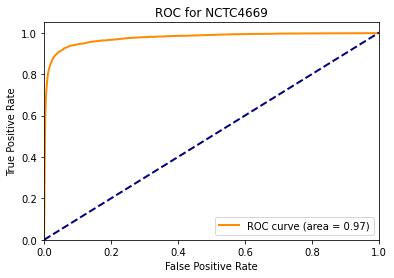

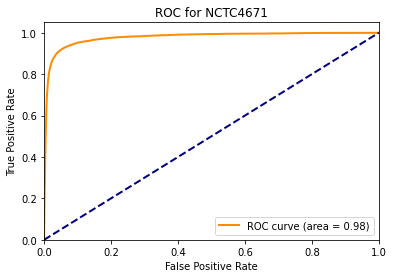

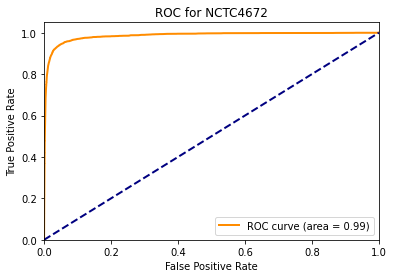

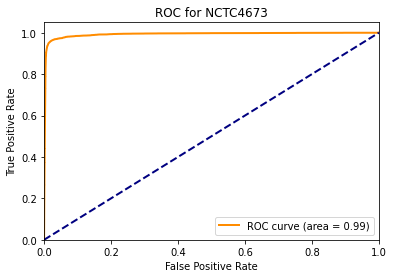

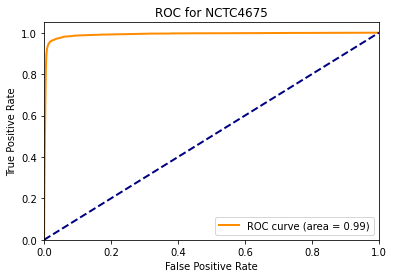

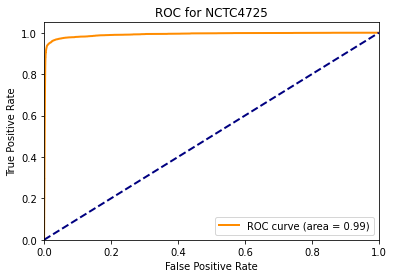

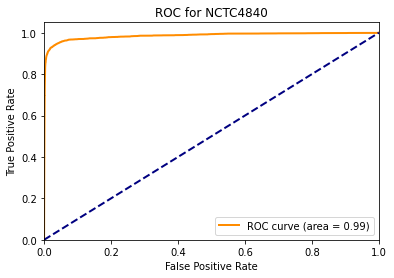

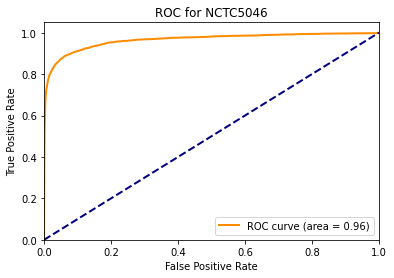

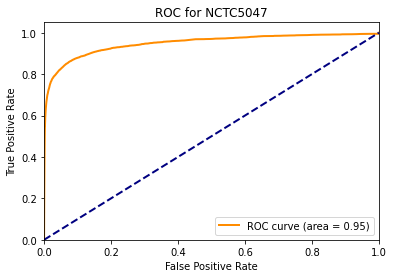

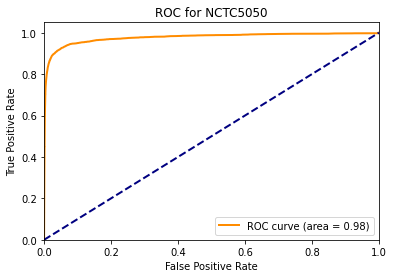

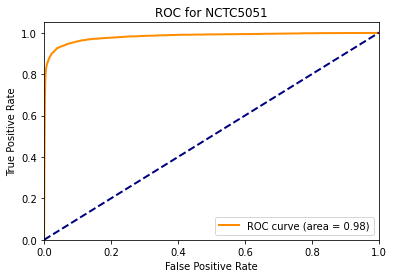

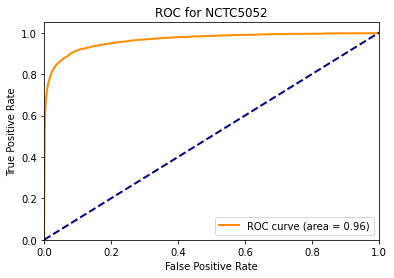

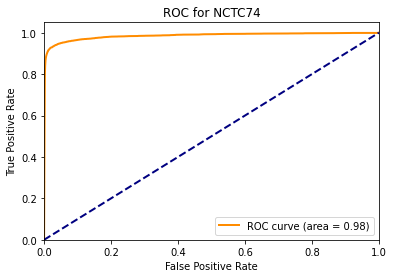

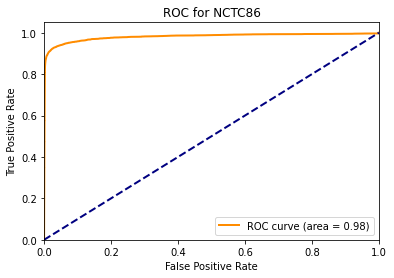

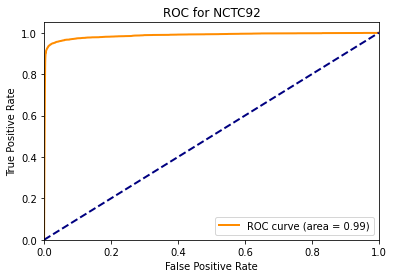

In [46]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[1])
    plt.pause(0.01)

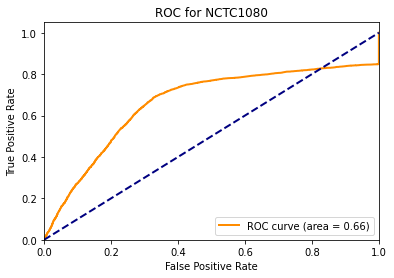

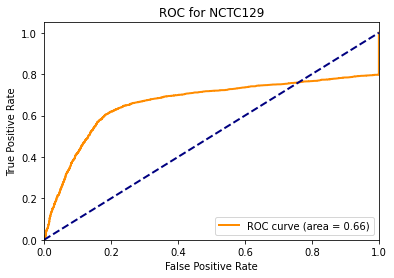

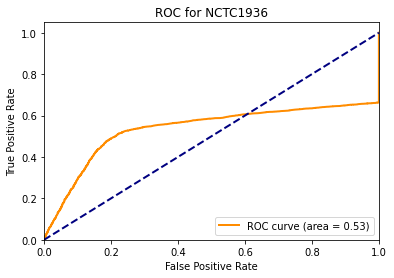

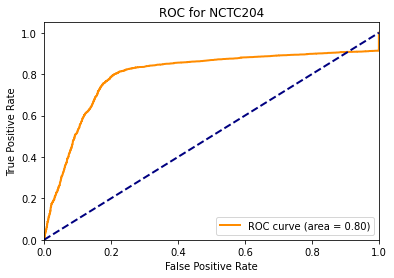

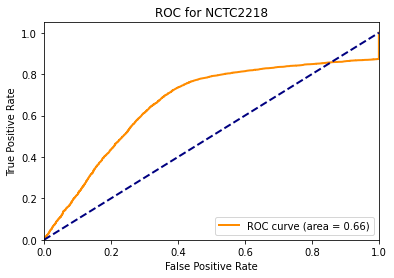

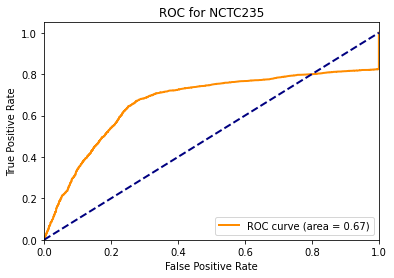

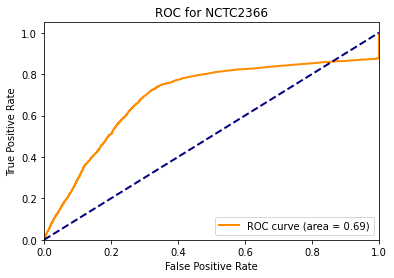

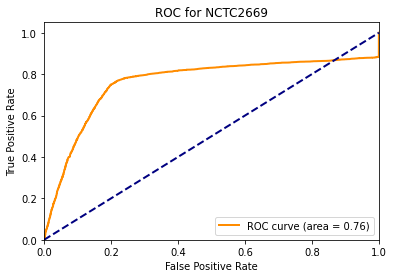

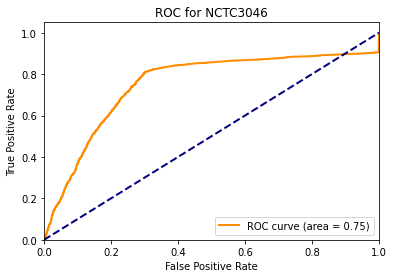

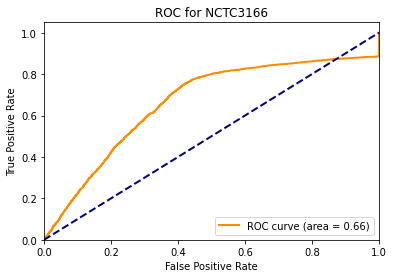

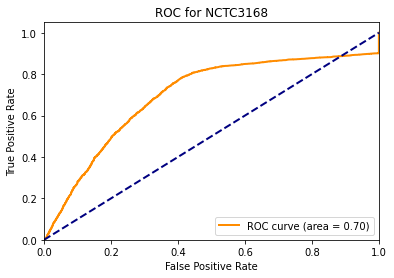

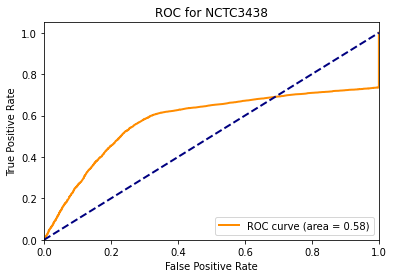

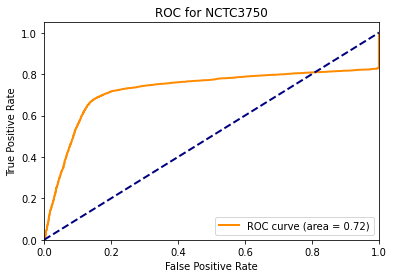

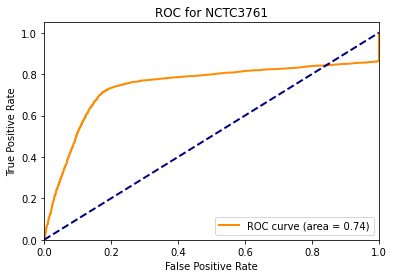

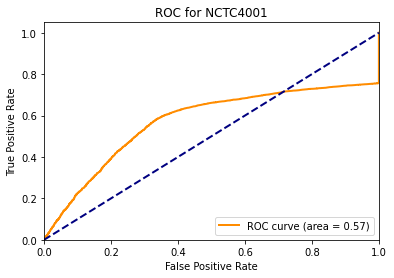

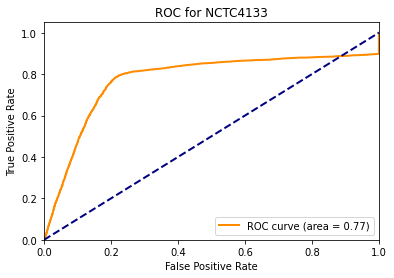

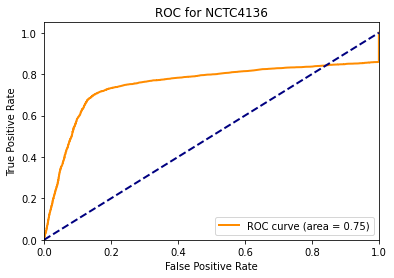

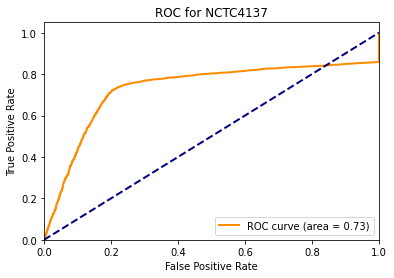

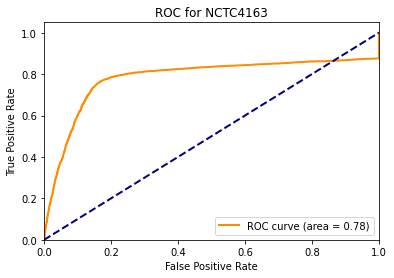

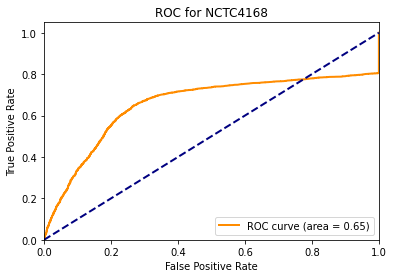

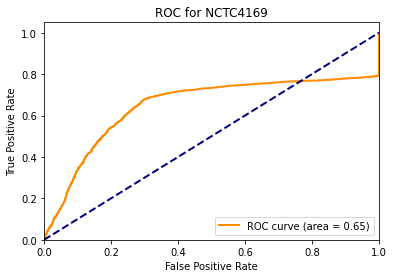

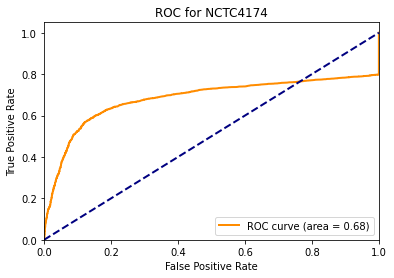

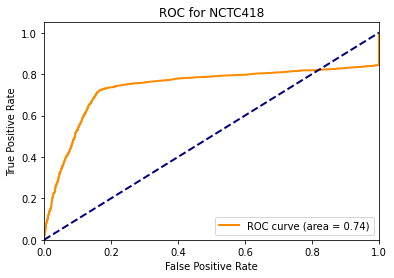

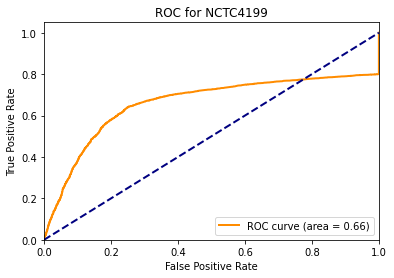

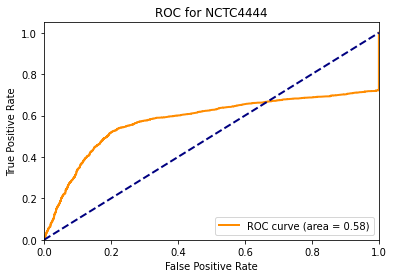

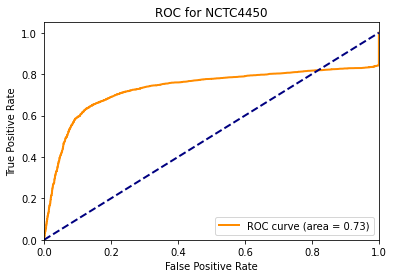

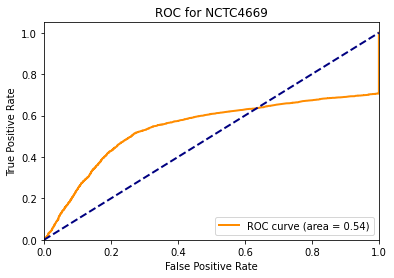

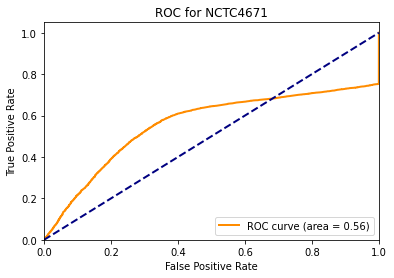

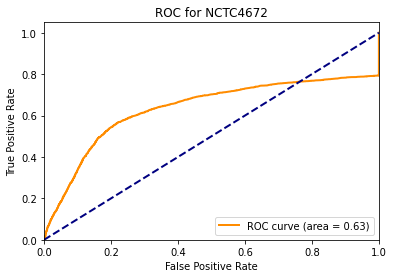

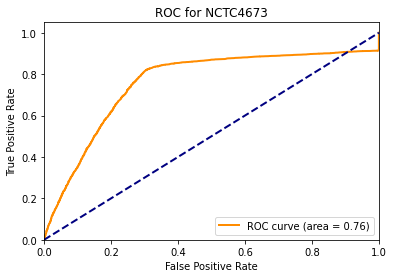

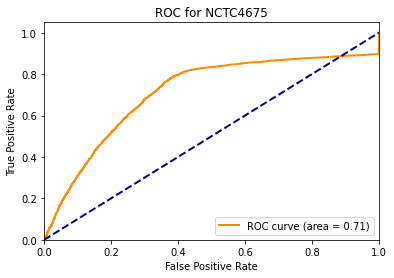

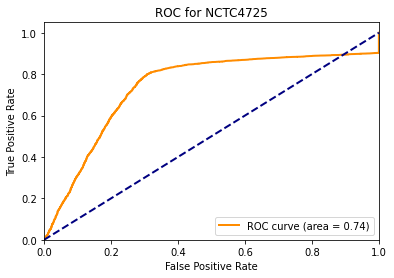

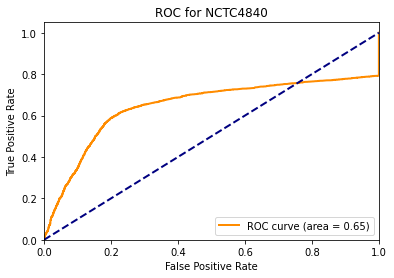

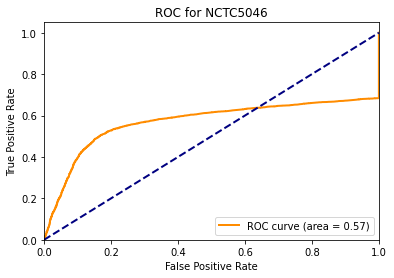

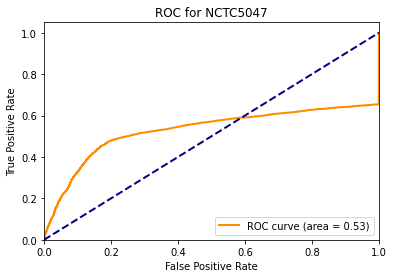

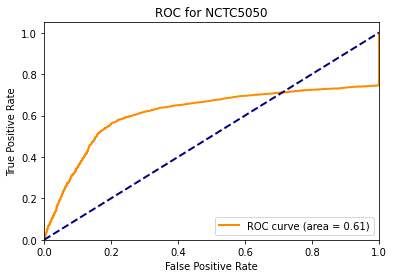

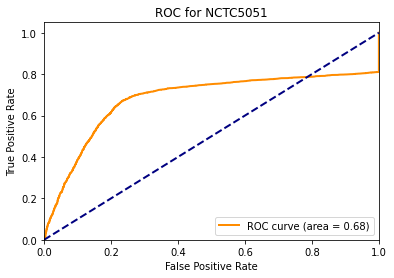

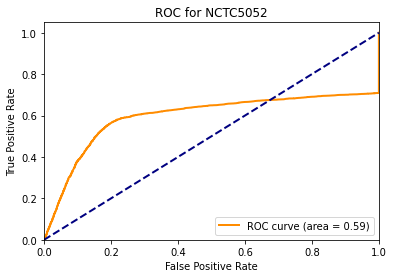

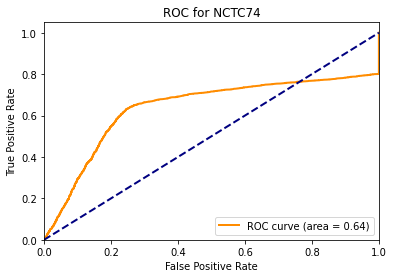

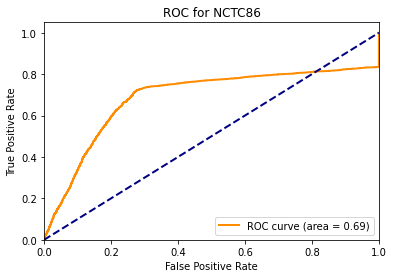

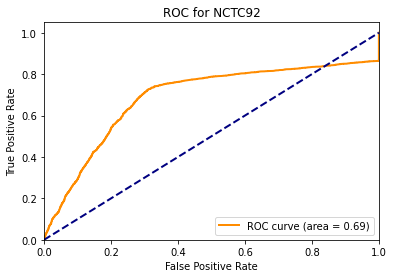

In [48]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[2])
    plt.pause(0.01)

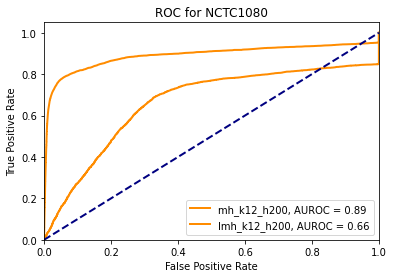

In [ ]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIR,['mh_k12_h200','lmh_k12_h200'])
    plt.pause(0.01)

In [105]:
def lexicographic_first(array,mask):
    best,idxs = [],[]
    for i,b in enumerate(array):
        idxs.append(i)
        best.append((array[i]-mask[i-idxs[0]]) % 4) # append to end of best (best idx is at idxs[0])
        j = 1
        while(len(idxs) > j):
            bm = (b-mask[i-idxs[j]]) % 4
            if bm > best[i-idxs[j]]:
                del idxs[j]
            elif bm < best[i-idxs[j]]:
                best = [*best[:i-idxs[j]], bm]
                idxs = idxs[j:]
                j = 1
            else: 
                j += 1
    return idxs[0]

In [109]:
def lexicographic_first2(array,mask):
    best,idxs = [],[]
    for i,b in enumerate(array):
        idxs.append(i)
        j = 0
        while(len(idxs) > j):
            bm = (b-mask[i-idxs[j]]) % 4
            if j==0:
                best.append(bm)
                j = 1
            elif bm > best[i-idxs[j]]:
                del idxs[j]
            elif bm < best[i-idxs[j]]:
                best = [*best[:i-idxs[j]], bm]
                idxs = idxs[j:]
                j = 1
            else: 
                j += 1
    return idxs[0]

In [110]:
lexicographic_first2(arr, mask)

KeyboardInterrupt: 

In [106]:
lexicographic_first(arr, mask)

760

In [99]:
arr[:5]

array([3, 1, 0, 1, 3])

In [100]:
mask[:5]

array([0, 1, 0, 1, 0])

In [97]:
arr = np.random.randint(4,size=1000)
mask = np.random.randint(4,size=1000)
lexicographic_first(arr, mask)

760